# Chapter 07 Exercises

## Name goes here

### Date

In [5]:
# Libraries you will need for this assignment. 
# The code below will import them for your use. 
# Please run this before continuing.
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Q1) Practice Importing Data (A Python Question)

In Data Camp, you will learned how to import .csv files into Python. This will be a valuable skill moving forward in the semester. In order to better prepare you, this question will provide example code so you can answer __Q2)__ of this assignment. After running the code below, print the datasets to ensure it has been read and imported correctly.

In [7]:
# For Q2), we will need two distinct datasets from FRED.
# For the sake of simplicity, we have downloaded the data and stored it on a remote server.
# This code requires the use of the Pandas library, we have abbreviated Pandas as pd (see the preamble).

# URL to first data set:
men_url = "https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/ch07_employment_ratio_men.csv"

# Import the data and save it to a variable:
men_emp_ratio = pd.read_csv(men_url,header=0, names=['Date', 'Men']) #the argument in the function pd.read_csv(argument) is the name of the variable.

# URL to second data set:
women_url = "https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/ch07_employment_ratio_women.csv"

# Import the data and save it to a variable:
women_emp_ratio = pd.read_csv(women_url,header=0, names=['Date', 'Women'])

# Print both datasets:
print(men_emp_ratio)
print(women_emp_ratio)



           Date   Men
0    1948-01-01  83.8
1    1948-02-01  83.9
2    1948-03-01  83.0
3    1948-04-01  83.3
4    1948-05-01  83.1
5    1948-06-01  83.7
6    1948-07-01  83.8
7    1948-08-01  83.5
8    1948-09-01  83.2
9    1948-10-01  83.5
10   1948-11-01  83.3
11   1948-12-01  83.5
12   1949-01-01  82.8
13   1949-02-01  82.6
14   1949-03-01  82.1
15   1949-04-01  82.0
16   1949-05-01  81.3
17   1949-06-01  80.9
18   1949-07-01  80.4
19   1949-08-01  80.7
20   1949-09-01  81.0
21   1949-10-01  80.0
22   1949-11-01  81.2
23   1949-12-01  81.0
24   1950-01-01  80.7
25   1950-02-01  80.7
26   1950-03-01  80.7
27   1950-04-01  81.1
28   1950-05-01  81.6
29   1950-06-01  81.8
..          ...   ...
817  2016-02-01  65.9
818  2016-03-01  65.9
819  2016-04-01  65.8
820  2016-05-01  65.7
821  2016-06-01  65.8
822  2016-07-01  65.8
823  2016-08-01  65.8
824  2016-09-01  65.8
825  2016-10-01  65.7
826  2016-11-01  65.8
827  2016-12-01  65.7
828  2017-01-01  65.9
829  2017-02-01  66.0
830  2017-

## Q2) The employment-population ratio for men and women (a FRED question)

Using the data imported from __Q1)__, answer the following questions:

__(a)__: Create one plot with two time-series, one for men and one for women. This plot shows the employment-population ratio by gender from 1948 to 2018. Please use the code from the Chapter 01 Homework __Q2)__ as a guide.

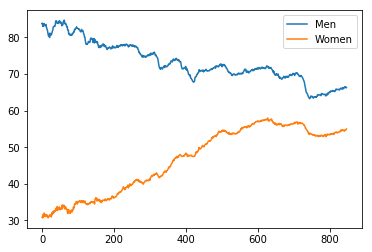

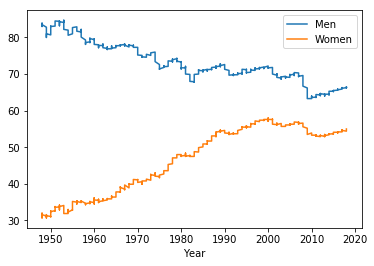

In [8]:
# First merge the two data frames into one. This will help make it easier to do the plot
df3 = pd.merge(men_emp_ratio, women_emp_ratio, on='Date', how='outer')

# Thie plot only shows the time period, not the date
df3.plot()

# If you want the date, this is another way, although it distorts the graph slightly
df3['Date'] = pd.to_datetime(df3['Date'])                   # Convert the date column into a datetime object
df3['Year'] = df3['Date'].dt.year                           # This will extract the year from the datetime object and store the year in a new column
df3.plot(x = 'Year', y = ['Men', 'Women'], kind = 'line')   # Make a plot

__(b)__: What are some possible explanations for the differences between the two series between 1950 and 2000?

During the post– World War II baby boom many women
left the labor force and re entered after their children had
grown. The stagflation events of the 1970s further caused
women to enter the labor force to maintain family living
standards.

__(c)__: What might explain the change in the trend of women's employment since 2000?

Since 2000, the trend for women has flattened out, where
about 55 percent of the female population is working. This
could be due to a lack of job opportunities for women, as the
employment growth stagnated in the first de cade of the
twenty- first century.

## Q3) How much is a college education worth?

In the text, we supposed a college education raised a person's wage by \\$30,000 per year, from \\$40,000 to \\$70,000. Assume the relevant interest rate is 3\%, there is no growth in wages, and you are expected to retire at 65 years old after you graduate high-school.

__(a)__: Suppose you are a 18 year old graduating high school senior deciding whether or not to go to college. What is the present discounted value of your labor earnings if you chose not to attend college?

In [40]:
hs_wage = 40000
col_wage = 70000
col_cost = 20000
r= 0.03
ret_age = 65
age = 18
col_lenght = 4

def pdv_annuity(pmt, nper, r):
    '''
    This function uses the constant annuity formula from Lecture 4 - Chapter 7, Slide 19
    Arguments:
        pmt: constant initial payment
        nper: number of periods
        r: interest rate in decimals    
    '''
    pdv = pmt * (1-(1 / (1 + r)) ** nper) / (1 - (1 / (1 + r)))
    return pdv

pdv_hs=pdv_annuity(hs_wage, ret_age-age, r)
print('Present Discouted Value of High School Graduate, r=3%:','${:,.2f}'.format(pdv_hs) )


Present Discouted Value of High School Graduate: $1,031,017.96


__(b)__ What is the present discounted value of your labor earnings if you chose to attend college?

In [41]:
def pdv_simple(fv, nper, r):
    '''
    This function uses the simple present value formula with 1 period compounding
    Arguments:
    fv: future value of sum of money
    nper: time elapsed from present to future
    r: interest rate in decimals
    '''
    pdv = fv/(1+r)**nper
    return pdv

# Assuming you will be in college for four years, we need to find the present discounted value of your future wages after graduation and 
# discount it to present day.

pdv_col=pdv_simple(pdv_annuity(col_wage, ret_age-age-col_lenght, r), col_lenght, r)

print('Present Discouted Value of College Graduate, r=3%:', '${:,.2f}'.format(pdv_col) ) # :, ads comma as thousands separator, .2f limits the string to two decimal places

Present Discouted Value of College Graduate: $1,536,278.64


__(c)__ What is the present discounted value of 4 years of your labor income if you forgo college and start work immediately?

In [42]:

pdv_op_cost=pdv_annuity(hs_wage, col_lenght, r)
print('Present Discounted Value of the Opportunity Cost of College, r=3%:','${:,.2f}'.format(pdv_op_cost) )

Present Discounted Value of the Opportunity Cost of College: $153,144.45


__(d)__: Suppose that college costs \\$20,000 per year. What is the present discounted value of your college education expenses?

In [43]:
pdv_col_cost=pdv_annuity(col_cost, col_lenght, r)
print('Present Discounted Value of the Cost of College, r=3%:','${:,.2f}'.format(pdv_col_cost) )

Present Discounted Value of the Cost of College: $76,572.23


__(e)__: What is the net present discounted value of a college education under these assumptions? 

In [44]:
pdv_net_col=pdv_col-pdv_col_cost-pdv_hs
print('Present Net Discounted Value of a College Education, r=3%:','${:,.2f}'.format(pdv_net_col))

Present Net Discounted Value of a College Education: $428,688.45


__(f)__ Now, suppose that the relevant interest rate increases to 8\%. How does that change the net present discounted value of your college education? What if instead the cost of attending college doubled? Please discuss your findings.

In [48]:
hs_wage = 40000
col_wage = 70000
col_cost = 20000
r= 0.08
ret_age = 65
age = 18
col_lenght = 4

pdv_hs=pdv_annuity(hs_wage, ret_age-age, r)
pdv_col=pdv_simple(pdv_annuity(col_wage, ret_age-age-col_lenght, r), col_lenght, r)
pdv_op_cost=pdv_annuity(hs_wage, col_lenght, r)
pdv_col_cost=pdv_annuity(col_cost, col_lenght, r)

pdv_net_col=pdv_col-pdv_col_cost-pdv_hs
print('Present Discounted Value of a College Education r=8%:','${:,.2f}'.format(pdv_net_col))

Present Discounted Value of a College Education r=8%: $72,183.54


There is an inverse relationship bewteen the present value of a future sum and the interest rate. The higher the interest rate, the lower the present value of a future sum of money. If interest rates were high, the future income earned by a college degree will be discouted more heavily, making it less valuable. 

Note that the interest rate in these calculations is the real interest rate. 

__(g)__ Statistically, workers with higher education levels work longer than unskilled workers. Suppose that you only work until 60 years old if keep your highschool degree, but work until 65 years old if you get a college degree. How does differences in lenght of working life affect the net discounted value of your college education?

In [51]:
hs_wage = 40000
col_wage = 70000
col_cost = 20000
r= 0.08
ret_age_col = 65
ret_age_hs = 60
age = 18
col_lenght = 4

pdv_hs = pdv_annuity(hs_wage, ret_age_hs-age, r)
pdv_col = pdv_simple(pdv_annuity(col_wage, ret_age_col-age-col_lenght, r), col_lenght, r)
pdv_op_cost = pdv_annuity(hs_wage, col_lenght, r)
pdv_col_cost = pdv_annuity(col_cost, col_lenght, r)

pdv_net_col = pdv_col-pdv_col_cost-pdv_hs
print('Present Discounted Value of a College Education r=8%:','${:,.2f}'.format(pdv_net_col))

hs_wage = 40000
col_wage = 70000
col_cost = 20000
r= 0.03
ret_age_col = 65
ret_age_hs = 60
age = 18
col_lenght = 4

pdv_hs = pdv_annuity(hs_wage, ret_age_hs-age, r)
pdv_col = pdv_simple(pdv_annuity(col_wage, ret_age_col-age-col_lenght, r), col_lenght, r)
pdv_op_cost = pdv_annuity(hs_wage, col_lenght, r)
pdv_col_cost = pdv_annuity(col_cost, col_lenght, r)

pdv_net_col=pdv_col-pdv_col_cost-pdv_hs
print('Present Discounted Value of a College Education r=3%:','${:,.2f}'.format(pdv_net_col))


Present Discounted Value of a College Education r=8%: $78,990.50
Present Discounted Value of a College Education r=3%: $483,210.41


The NPDV of a college education increases roughly by $\$6,000$ when interest rates are $8\%$, and by $\$55,000$ when interest rates are $3\%$